In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# Loading Dataset

In [151]:
data = pd.read_csv('Data.csv',parse_dates=["Timestamp"])
df_main = pd.DataFrame(data)
df_main.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
state=pd.read_csv('State_data.csv')
df_state=pd.DataFrame(state)
df_state.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [153]:
NCAP=pd.read_csv('NCAP_Funding.csv')
df_ncap=pd.DataFrame(NCAP)
df_ncap.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


# Spatial Aggregation

**Q1.** Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [154]:
data = pd.read_csv('Data.csv',parse_dates=['Timestamp'])
df_main = pd.DataFrame(data)
avg_pm25 = df_main.groupby('state')['PM2.5'].mean()
high_pm25_state=avg_pm25.idxmax()
its_value=avg_pm25[high_pm25_state]
print(f"State with the highest average PM2.5 concentration: {high_pm25_state} ({its_value} µg/m³)")

State with the highest average PM2.5 concentration: Delhi (104.1009176780069 µg/m³)


**Q2.** Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [155]:
df_main_2023=df_main[df_main["Timestamp"].dt.year == 2023]
df_main_2023_haz=df_main_2023[df_main_2023['PM2.5']>300]

df_main_2023_haz
hazardous_days_per_state=df_main_2023_haz.groupby("state")["Timestamp"].nunique()
hazardous_days_per_state

most_hazardous_state=hazardous_days_per_state.idxmax()
most_hazardous_days=hazardous_days_per_state.max()

print(f"The state with the most days of hazardous PM2.5 levels in 2023 is {most_hazardous_state} with {most_hazardous_days} days.")

The state with the most days of hazardous PM2.5 levels in 2023 is Delhi with 49 days.


**Q3.** Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [156]:
variability_per_state=df_main_2023.groupby('state')['PM2.5'].std()
state_variability=variability_per_state.groupby("state").mean()

highest_variability_state=state_variability.idxmax()
highest_variability_value=state_variability.max()

print(f"The state with the highest PM2.5 variability across its monitoring stations in 2023 is {highest_variability_state} with a variability of {highest_variability_value:.2f}.")

The state with the highest PM2.5 variability across its monitoring stations in 2023 is Delhi with a variability of 82.80.


We have used stadard deviation as a measure of variability because it will reflect how the pollution floctuate within the state. It will help us to determine which state has the most inconsistent air quality.

**Q4.** Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [157]:
df_main_covid=df_main[df_main["Timestamp"].dt.year.between(2020,2021)]
state_average=df_main_covid.groupby('state')['PM2.5'].mean()

highest_average_state=state_average.idxmin()
highest_average_value=state_average.min()

print(f"The state with the lowest PM2.5 during covid is {highest_average_state} with an average of {highest_average_value:.2f}.")

The state with the lowest PM2.5 during covid is Mizoram with an average of 14.32.


# Temporal Aggregation

**Q1.** Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [158]:
pm25_aug_2020=df_main.loc[(df_main['Timestamp'].dt.year==2020) & (df_main['Timestamp'].dt.month==8)]

aug_high_index=pm25_aug_2020['PM2.5'].idxmax()

station_high_august=pm25_aug_2020.loc[aug_high_index]['station']
value_high_august=pm25_aug_2020.loc[aug_high_index]['PM2.5']

print(f"The station that reported the highest value of PM2.5 in the month of august of 2020 is {station_high_august} and the maximum value is {value_high_august}")

The station that reported the highest value of PM2.5 in the month of august of 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB and the maximum value is 805.51


**Q2.** For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

In [159]:
df_main_2018=df_main[df_main['Timestamp'].dt.year==2018]
station_names="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_main_2018_stations=df_main_2018[df_main_2018['station']==station_names]

# Different seasons
df_main_2018_summer=df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month.between(3,5)]['PM2.5'].mean()
df_main_2018_monsoon=df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month.between(6,9)]['PM2.5'].mean()
df_main_2018_winter=pd.concat([df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month.between(1,2)],df_main_2018_stations[df_main_2018_stations['Timestamp'].dt.month==12]],ignore_index=True)['PM2.5'].mean()
# df_main_2018_summer=0 if np.isnan(df_main_2018_summer) else df_main_2018_summer

map_season=pd.Series({
    'Summer':df_main_2018_summer,
    'Monsoon':df_main_2018_monsoon,
    'Winter':df_main_2018_winter
})

max_polluted_season=map_season.idxmax()

print(f'''Average PM2.5 for Summer is: {df_main_2018_summer}
Average PM2.5 for Winter is: {df_main_2018_winter}
Average PM2.5 for Monsoom is: {df_main_2018_monsoon}
The season with maximum pollutant is: {max_polluted_season}''')


Average PM2.5 for Summer is: nan
Average PM2.5 for Winter is: 67.4923443634478
Average PM2.5 for Monsoom is: 34.42519611317571
The season with maximum pollutant is: Winter


Method 2 (Chatgpt)
This thing is much more efficient and gives me more flexibility than the previous code that I wrote

In [160]:
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_main_2018_station = df_main_2018[df_main_2018["station"] == station_name]

# Define seasonal mapping this thing I don't know
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Other"  # Not needed but added for clarity

# Create a new column for season
df_main_2018_station["season"] = df_main_2018_station["Timestamp"].dt.month.apply(get_season)  # I did not knew this practical application of apply function
seasonal_avg_pm25 = df_main_2018_station.groupby("season")["PM2.5"].mean()

# Identify the season with the highest pollution
highest_pollution_season = seasonal_avg_pm25.idxmax()

print("Average PM2.5 concentration per season in 2018:")
print(seasonal_avg_pm25)
print(f"\nThe season with the highest pollution is: {highest_pollution_season}")


Average PM2.5 concentration per season in 2018:
season
Monsoon    34.425196
Other      56.825144
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64

The season with the highest pollution is: Winter


**[Thought Question].** Can you suggest some potential factors on why certain seasons are generally more polluted than others?

**Response**
Winter is generally more polluted because in winter cold air sorrouded the earth surface. above cold air a layer of hot air is present which act as a lid, preventing pollutants from dispersing to the upper atmosphere. This phenomenon is called "thermal inversion".

In monsoon pollutants (Mostly particulate materials) trapped inside rainwater and falls to the ground. Thus this season is least polluted.

**Q3.** Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends.

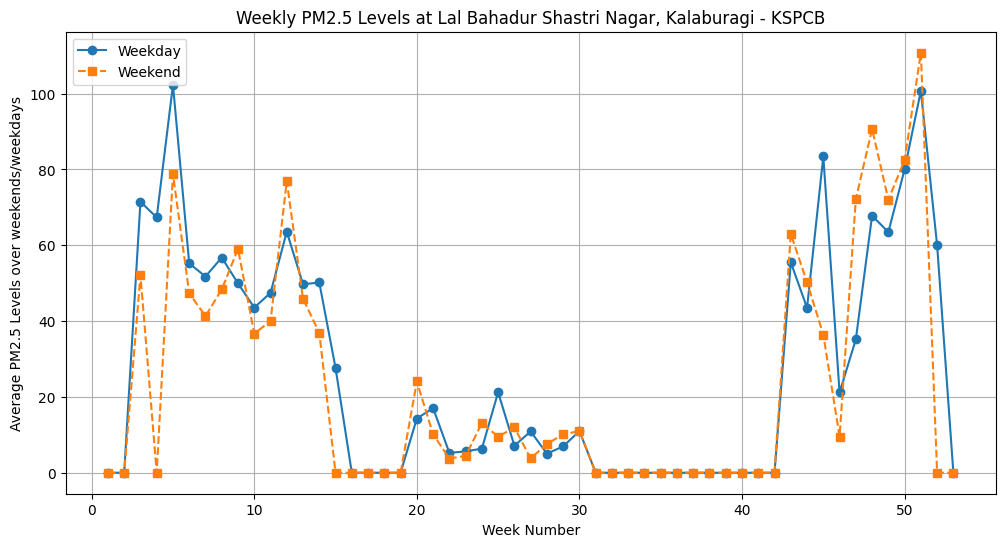

Weekday
Weekday    42.789802
Weekend    41.134580
Name: PM2.5, dtype: float64


In [161]:
station_name="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_main_2021=df_main[df_main['Timestamp'].dt.year==2021]
df_main_2021_station = df_main_2021[df_main_2021["station"] == station_name]

def get_weekday(day):
    if day in [0,1,2,3,4]:
        return 'Weekday'
    elif day in [5,6]:
        return 'Weekend'
df_main_2021_station['Weekday']=df_main_2021_station['Timestamp'].dt.weekday.apply(get_weekday)
df_main_2021_station['Week no.']=df_main_2021_station['Timestamp'].dt.isocalendar().week
grouped_data=df_main_2021_station.groupby(['Week no.','Weekday'])['PM2.5'].mean().unstack().fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Weekday'], label='Weekday', marker='o', linestyle='-')
plt.plot(grouped_data.index, grouped_data['Weekend'], label='Weekend', marker='s', linestyle='--')
plt.xlabel('Week Number')
plt.ylabel('Average PM2.5 Levels over weekends/weekdays')
plt.title(f'Weekly PM2.5 Levels at {station_name}')
plt.legend()
plt.grid(True)
plt.show()

print(df_main_2021_station.groupby('Weekday')['PM2.5'].mean())
# df_main_2021_station

MONTHLY Trend

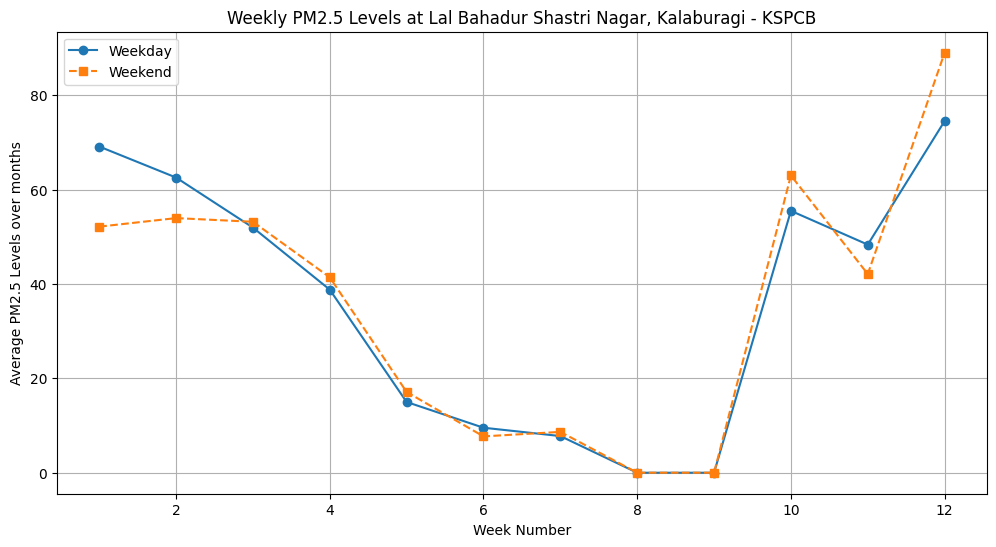

Weekday
Weekday    42.789802
Weekend    41.134580
Name: PM2.5, dtype: float64


In [162]:
df_main_2021_station['Month no.']=df_main_2021_station['Timestamp'].dt.month
grouped_data=df_main_2021_station.groupby(['Month no.','Weekday'])['PM2.5'].mean().unstack().fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Weekday'], label='Weekday', marker='o', linestyle='-')
plt.plot(grouped_data.index, grouped_data['Weekend'], label='Weekend', marker='s', linestyle='--')
plt.xlabel('Week Number')
plt.ylabel('Average PM2.5 Levels over months')
plt.title(f'Weekly PM2.5 Levels at {station_name}')
plt.legend()
plt.grid(True)
plt.show()

print(df_main_2021_station.groupby('Weekday')['PM2.5'].mean())

# Spatio-Temporal Aggregation

**Q1.** For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [163]:
# Write your code here
df_main_2022=df_main[df_main["Timestamp"].dt.year == 2022]
def get_season(month):
    if month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
df_main_2022["season"]=df_main_2022["Timestamp"].dt.month.apply(get_season) 
grouped_data=df_main_2022.groupby(['state','season'])['PM2.5'].mean().unstack().fillna(0)
grouped_data['Change']=((grouped_data['Summer']-grouped_data['Monsoon'])*100)/grouped_data['Monsoon']

print(f'The percentage value for PM2.5 is increased by {grouped_data["Change"].max():.4f} in summer than winter in {grouped_data["Change"].idxmax()} state in the year 2022')

The percentage value for PM2.5 is increased by 157.5754 in summer than winter in Assam state in the year 2022


**Q2.** Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

Season    Monsoon     Summer      Winter
Year                                    
2017    52.058519  98.525562  168.601736
2018    51.366940  92.307981  189.692843
2019    46.200330  84.982546  179.034521
2020    38.362705  53.583184  158.383736
2021    41.243770  78.184788  182.867699
2022    42.769572  95.667628  147.476104
2023    40.538087  70.216212  166.011412


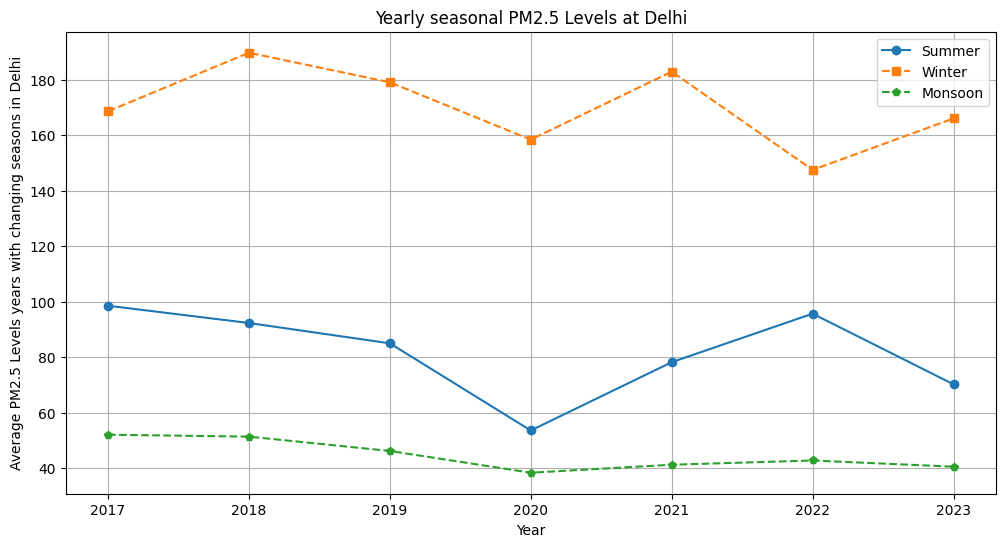

In [164]:
def get_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return 'Monsoon'
df_main_17_23=df_main[df_main['Timestamp'].dt.year.between(2017,2023)]
df_main_17_23_delhi=df_main_17_23[df_main_17_23['state']=='Delhi']
df_main_17_23_delhi['Season']=df_main_17_23_delhi['Timestamp'].dt.month.apply(get_season)
df_main_17_23_delhi['Year']=df_main_17_23_delhi['Timestamp'].dt.year
grouped_data=df_main_17_23_delhi.groupby(['Year','Season'])['PM2.5'].mean().unstack()
print(grouped_data)
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data['Summer'], label='Summer', marker='o', linestyle='-')
plt.plot(grouped_data.index, grouped_data['Winter'], label='Winter', marker='s', linestyle='--')
plt.plot(grouped_data.index, grouped_data['Monsoon'], label='Monsoon', marker='p', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels years with changing seasons in Delhi')
plt.title(f'Yearly seasonal PM2.5 Levels at Delhi')
plt.legend()
plt.grid(True)
plt.show()

In general pollution is more in Winter, then summer then monsoon.

There is lockdown in 2020 which result in no data collection justifying the minima in the graph

which is also the case of 2022 january lockdown

**Q3.** Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

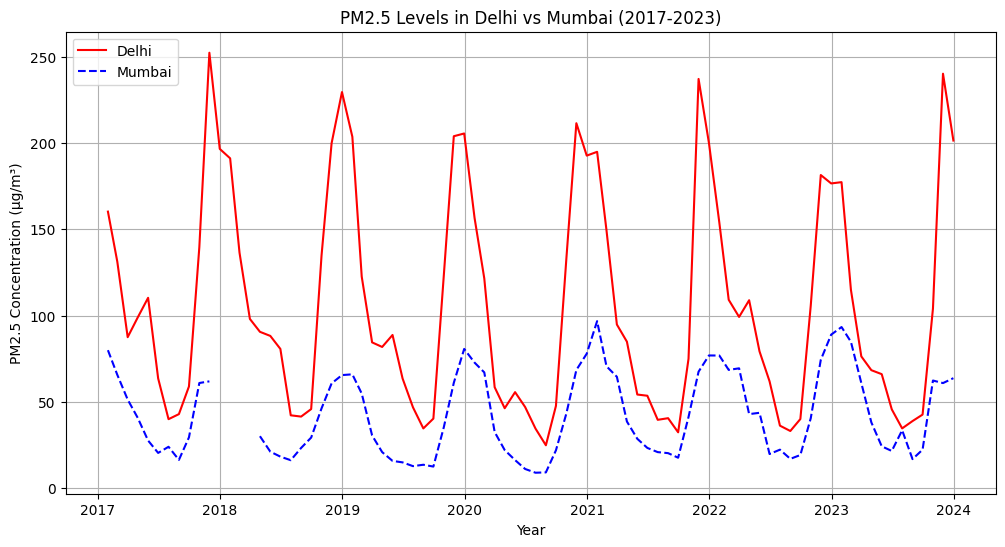

Delhi has a standard deviation of 62.97537601185315 where as mumbai has 24.5258009141125 we can clearly see that Delhi has more seasonal flactuations in PM2.5 levels than Mumbai 


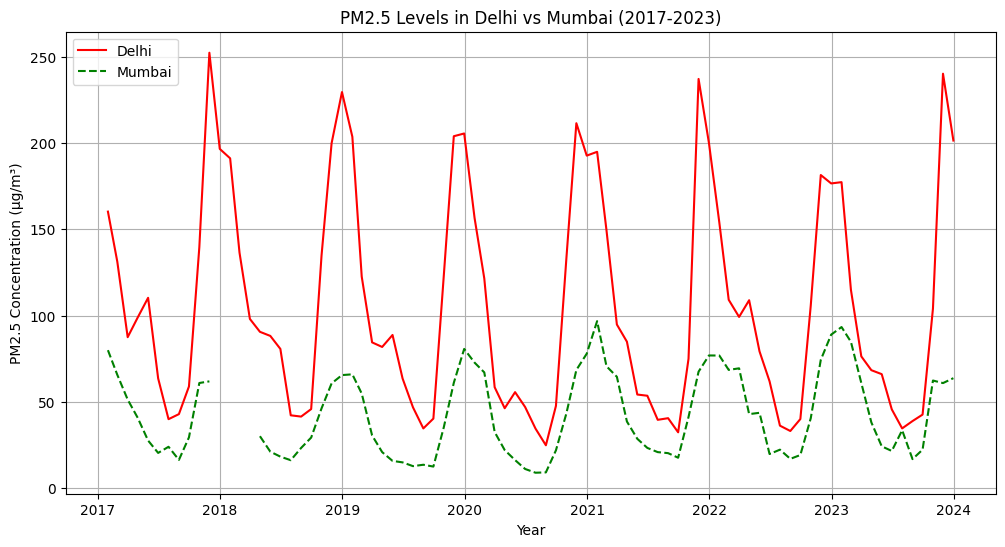

Delhi has more fluctuation than mumbai 62.97537601185315


In [165]:
df_main_17_23_comp=df_main_17_23[df_main_17_23['city'].isin(['Mumbai','Delhi'])]
df_grouped_1= df_main_17_23_comp.groupby([pd.Grouper(key="Timestamp", freq="M"),"city"])["PM2.5"].mean().unstack()
df_grouped_2=df_main_17_23_comp.groupby(["city", pd.Grouper(key="Timestamp", freq="M")])["PM2.5"].mean().reset_index()

# Method 1
df_pivot = df_grouped_2.pivot(index="Timestamp", columns="city", values="PM2.5")  # For easy plotting
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot["Delhi"], label="Delhi", color="red", linestyle="-")
plt.plot(df_pivot.index, df_pivot["Mumbai"], label="Mumbai", color="blue", linestyle="--")
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.title("PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

fluc_delhi=df_pivot["Delhi"].std()
fluc_Mumbai=df_pivot["Mumbai"].std()

print(f'Delhi has a standard deviation of {fluc_delhi} where as mumbai has {fluc_Mumbai} we can clearly see that Delhi has more seasonal flactuations in PM2.5 levels than Mumbai ')

# Medthod 2
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_1.index, df_grouped_1['Delhi'], label='Delhi',color='r' ,linestyle='-')
plt.plot(df_grouped_1.index, df_grouped_1['Mumbai'], label='Mumbai',color='g', linestyle='--')
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.title("PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

fluc_delhi = df_grouped_1['Delhi'].std()
fluc_mumbai = df_grouped_1["Mumbai"].std()

if fluc_delhi>fluc_Mumbai:
    print("Delhi has more fluctuation than mumbai",fluc_delhi)
else:
    print("Mumbai has more fluctuation than delhi",fluc_mumbai)


# Population-Based

**Q1.** Which state in India has the highest number of monitoring stations relative to its population?

In [166]:
station_num=df_main.groupby('state')['station'].nunique().reset_index()
merge=df_state.merge(station_num,left_on="State", right_on="state", how="inner").drop(columns=['state'])
merge['Station/Population']=merge['station']/merge['Population']

print(f"The state having highest number of monitoring stations relative to it's population is {merge.loc[merge['Station/Population'].idxmax(),'State']}" )

The state having highest number of monitoring stations relative to it's population is Chandigarh


**Q2.** Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

         State  Population  Area (km2)  station  Station/Population  \
29  Chandigarh     1055450         114        3        2.842390e-06   
30      Sikkim      610577        7096        1        1.637795e-06   
22     Tripura     3673917       10491        2        5.443781e-07   
27  Puducherry     1247953         479        1        8.013122e-07   
25    Nagaland     1978502       16579        1        5.054329e-07   

        PM2.5  PM2.5 per capita  
29  59.414055          0.000056  
30  14.927530          0.000024  
22  80.469872          0.000022  
27  24.286078          0.000019  
25  32.721157          0.000017  


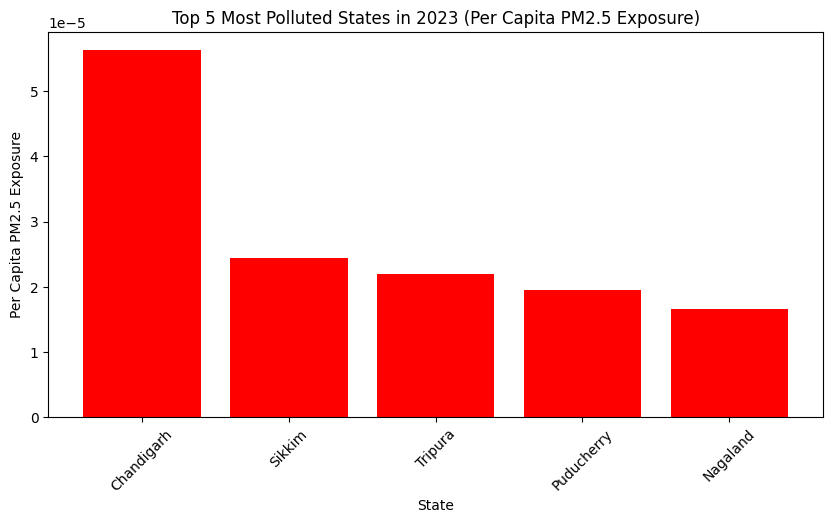

In [167]:
df_main_2023_polluted=df_main_2023.groupby('state')['PM2.5'].mean().reset_index()
merge_1=merge.merge(df_main_2023_polluted,left_on="State", right_on="state", how="inner").drop(columns=['state'])
merge_1['PM2.5 per capita']=merge_1['PM2.5']/merge_1['Population']

top_5_states = merge_1.nlargest(5, 'PM2.5 per capita')
print(top_5_states)

plt.figure(figsize=(10, 5))
plt.bar(top_5_states['State'], top_5_states['PM2.5 per capita'], color='red')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)")
plt.xticks(rotation=45)
plt.show()


**Q3.** Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
a. X-axis: Population density (people per square kilometer).

b. Y-axis: Average PM2.5 concentration.

c. Use a scatter plot to show the relationship, where each point represents a state.



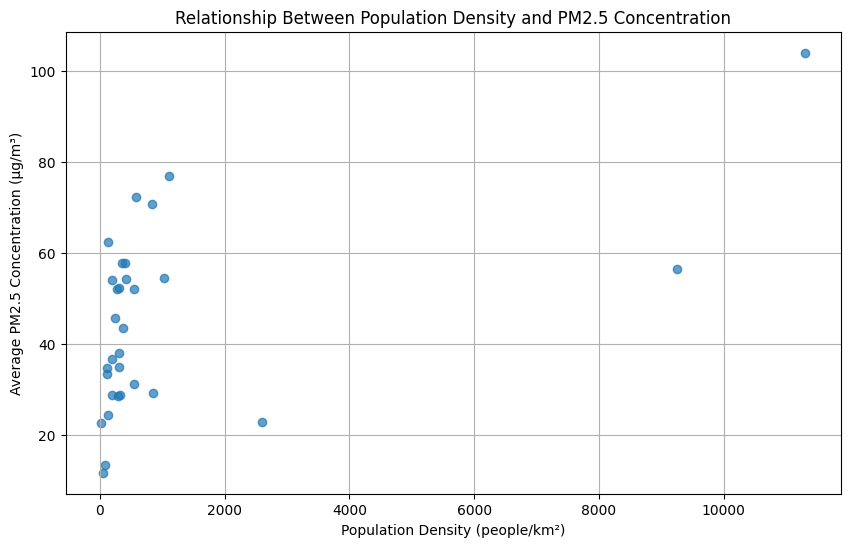

In [168]:

pm25=df_main.groupby('state')['PM2.5'].mean().reset_index()
merge_all=df_state.merge(pm25,left_on='State',right_on="state").drop(columns=['state'])

merge_all['Population density']=merge_all['Population']/merge_all['Area (km2)']

plt.figure(figsize=(10, 6))
plt.scatter(merge_all['Population density'],merge_all['PM2.5'], alpha=0.7)
plt.xlabel("Population Density (people/km²)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.title("Relationship Between Population Density and PM2.5 Concentration")
# plt.xscale("log")  # Log scale for better visualization if density values vary widely
plt.grid(True)
plt.show()

Highe3r population density signifies higher average pm2.5 concentration.

# Area-Based

**Q1.** Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

a. X-axis: States.

b. Y-axis: PM2.5 concentration per square kilometer.

c. Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


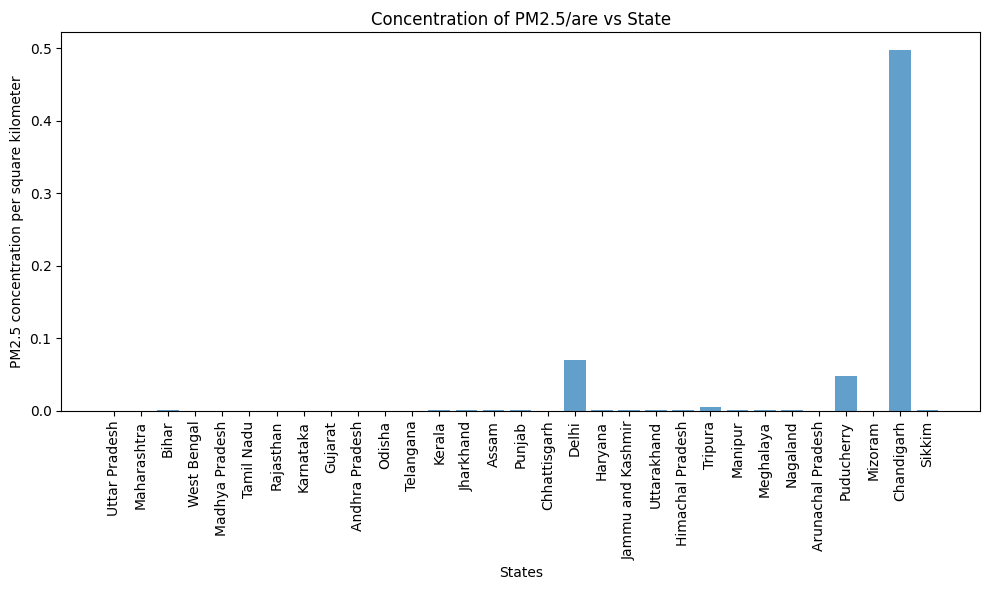

KeyError: 'PM2.5/km2'

In [169]:
merge_all['PM2.5/km2']=merge_all['PM2.5']/merge_all['Area (km2)']

plt.figure(figsize=(10, 6))
plt.bar(merge_all['State'],merge_all['PM2.5/km2'], alpha=0.7)
plt.xlabel("States")
plt.ylabel("PM2.5 concentration per square kilometer")
plt.xticks(rotation=90)
plt.title("Concentration of PM2.5/are vs State")
plt.tight_layout()
plt.show()

highest_per_area=merge_1['PM2.5/km2'].idxmax()

state=merge_1.loc[highest_per_area,'State']
concentration=merge_1.loc[highest_per_area,'PM2.5/km2']

print(f'{state} is the state with highest PM2.5 concentraion per unit square kilometer ({concentration})')

**Q2.** Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area.

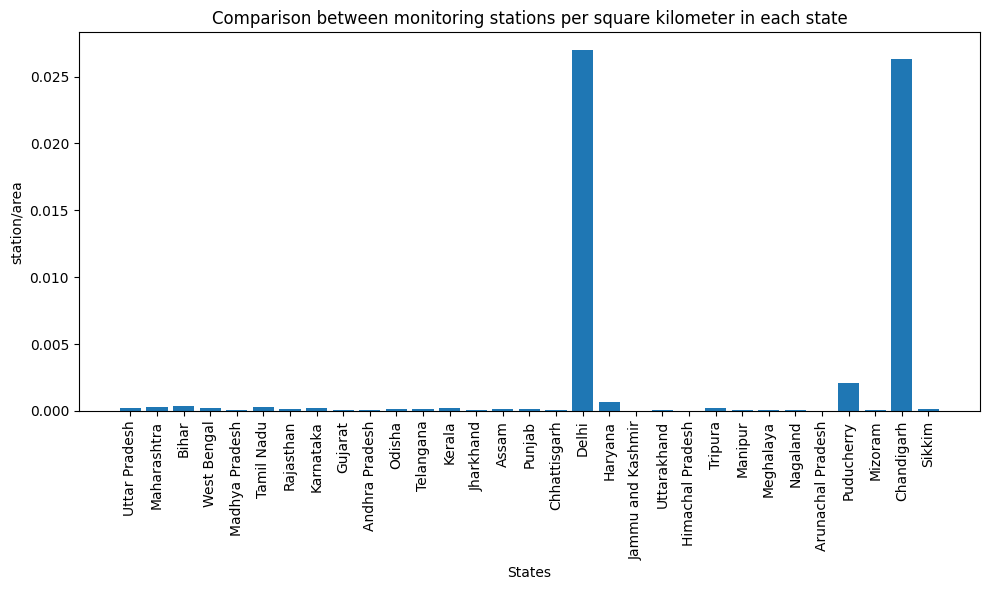


Delhi is the state with highest number of stations per square kilometer


In [ ]:
num_stations=df_main.groupby('state')['station'].nunique().reset_index()

merge_all=merge_all.merge(num_stations,left_on="State",right_on='state').drop(columns=['state'])

merge_all['station/area']=merge_all['station']/merge_all['Area (km2)']


plt.figure(figsize=(10, 6))
plt.bar(merge_all['State'],merge_all['station/area'])
plt.xlabel("States")
plt.ylabel("station/area")
plt.xticks(rotation=90)
plt.title("Comparison between monitoring stations per square kilometer in each state")
plt.tight_layout()
plt.show()


high_station_dens=merge_1['station/area'].idxmax()
print(f'\n{merge_1.loc[high_station_dens,'State']} is the state with highest number of stations per square kilometer')


**Q3.** Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

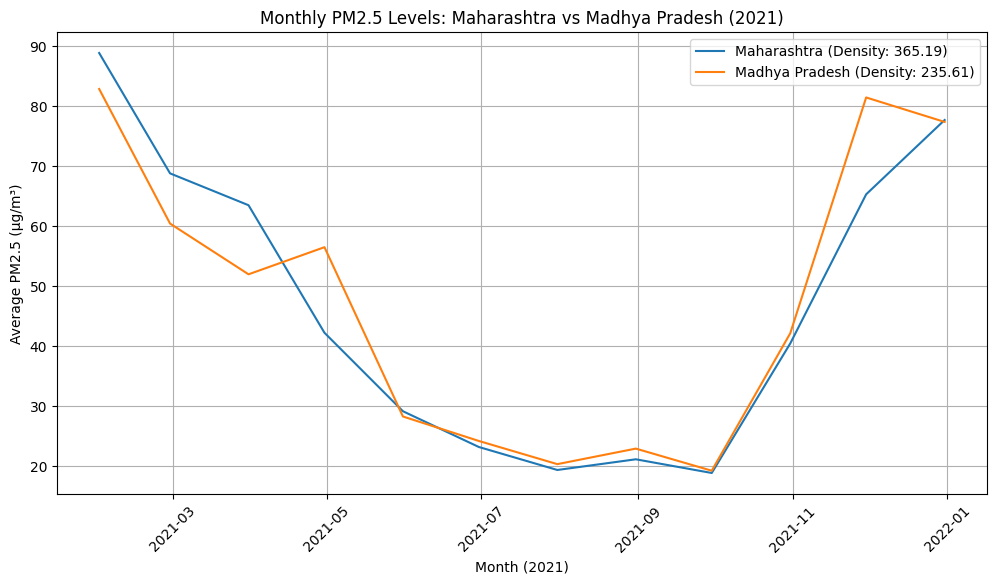

Maharashtra has a higher population density (365.19 people/km²) than Madhya Pradesh (235.61 people/km²).
PM2.5 levels are consistently higher in Maharashtra, this suggests that higher population density contributes to higher pollution levels.


In [ ]:
df_2021_MM= df_main[(df_main['Timestamp'].dt.year == 2021) & (df_main['state'].isin(['Maharashtra', 'Madhya Pradesh']))]

df_monthly_avg= df_2021_MM.groupby([pd.Grouper(key="Timestamp", freq="M"), "state"])["PM2.5"].mean().reset_index()

state_data_filtered = df_state[df_state['State'].isin(['Maharashtra', 'Madhya Pradesh'])]
state_data_filtered["Population Density"] = state_data_filtered["Population"] / state_data_filtered["Area (km2)"]

df_final = df_monthly_avg.merge(state_data_filtered[['State', 'Population Density']], left_on='state',right_on="State", how='left')

plt.figure(figsize=(12, 6))
for state in ['Maharashtra', 'Madhya Pradesh']:
    subset = df_final[df_final["State"] == state]
    plt.plot(subset["Timestamp"], subset["PM2.5"], label=f"{state} (Density: {subset['Population Density'].values[0]:.2f})")

plt.xlabel("Month (2021)")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Monthly PM2.5 Levels: Maharashtra vs Madhya Pradesh (2021)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analysis
maha_density = state_data_filtered[state_data_filtered['State'] == 'Maharashtra']['Population Density'].values[0]
mp_density = state_data_filtered[state_data_filtered['State'] == 'Madhya Pradesh']['Population Density'].values[0]

if maha_density > mp_density:
    print(f"Maharashtra has a higher population density ({maha_density:.2f} people/km²) than Madhya Pradesh ({mp_density:.2f} people/km²).")
    print("PM2.5 levels are consistently higher in Maharashtra, this suggests that higher population density contributes to higher pollution levels.")
else:
    print(f"Madhya Pradesh has a higher population density ({mp_density:.2f} people/km²) than Maharashtra ({maha_density:.2f} people/km²).")
    print("PM2.5 levels are consistently higher in Madhya Pradesh, this suggests that other factors besides population density contribute to pollution.")

# Funding-Based

**Q1.** Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

['Andhra Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi'
 'Gujarat' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Nagaland' 'Odisha' 'Punjab'
 'Rajasthan' 'Tamil Nadu' 'Telangana' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']


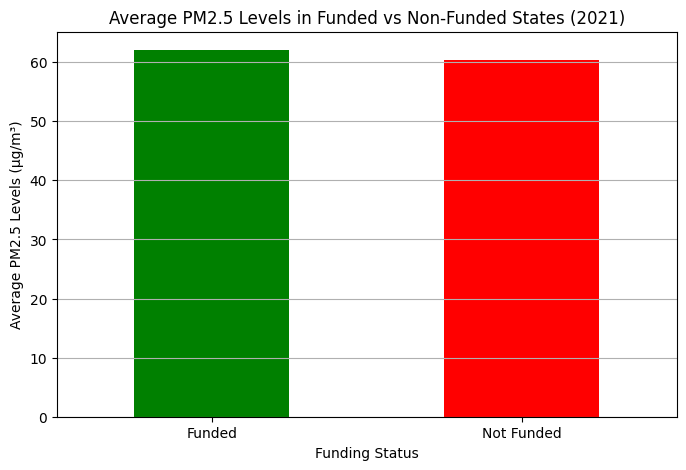

In [ ]:
funded_states = df_ncap["State"].unique()
print(funded_states)

df_main_2021["Funding Status"] = df_main_2021["state"].apply(lambda x: "Funded" if x in funded_states else "Not Funded")

funding_comparison = df_main_2021.groupby("Funding Status")["PM2.5"].mean()

plt.figure(figsize=(8, 5))
funding_comparison.plot(kind="bar", color=["green", "red"])
plt.xlabel("Funding Status")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title("Average PM2.5 Levels in Funded vs Non-Funded States (2021)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


**Q2.** Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

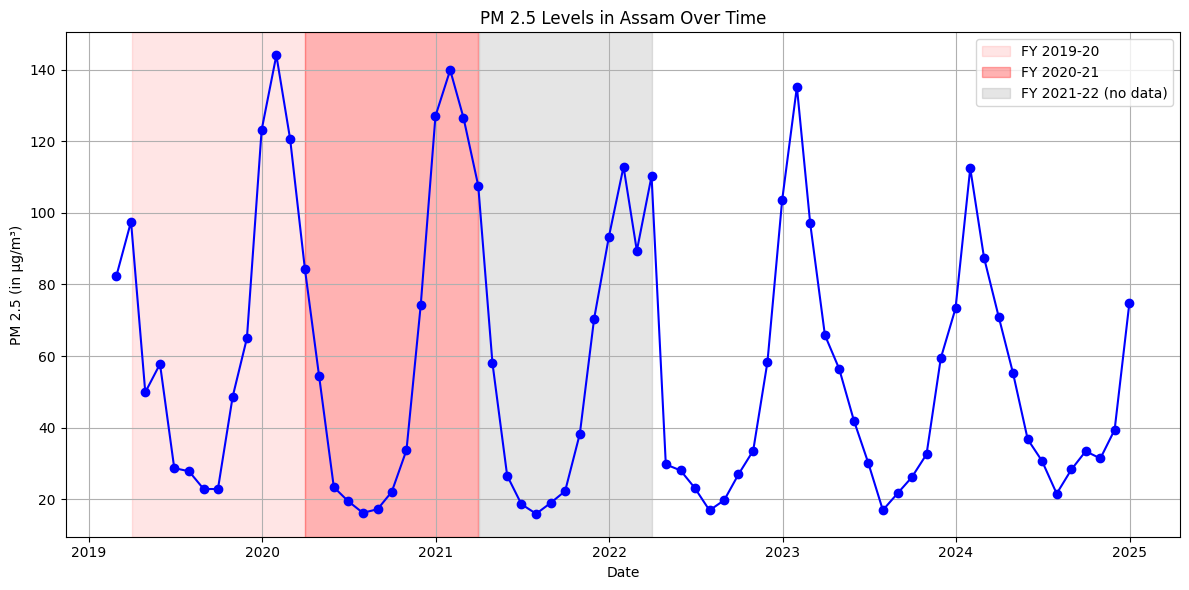

,FY 2019-20,FY 2020-21,FY 2021-22
count,365.000000,443.000000,710.000000
mean,66.095790,75.200235,56.865279
std,67.058464,56.853823,41.470159
min,6.026234,1.877647,6.245474
25%,24.695106,21.554788,20.283306
50%,45.635895,65.146000,45.977926
75%,95.315158,122.476643,88.021542
max,916.670000,272.423830,192.649468


In [ ]:
data_assam = df_main[df_main["state"] == "Assam"]
assam_cities = df_ncap[df_ncap['State'] == 'Assam']['City'].unique()
assam_pm = df_main[
    (df_main['state'] == 'Assam') &
    df_main['city'].isin(assam_cities) &
    pd.notna(df_main['PM2.5'])
    ]
assam_pm_grouped = assam_pm.groupby(pd.Grouper(key='Timestamp', freq='M')).agg({"PM2.5": "mean"})
assam_pm_grouped

plt.figure(figsize=(12, 6))
plt.plot(assam_pm_grouped["PM2.5"], color='blue', linestyle='-', marker='o')

# Adding shaded regions to differentiate financial years
plt.axvspan(pd.Timestamp('2019-04-01'), pd.Timestamp('2020-03-31'), color='red', alpha=0.1, label='FY 2019-20')
plt.axvspan(pd.Timestamp('2020-04-01'), pd.Timestamp('2021-03-31'), color='red', alpha=0.3, label='FY 2020-21')
plt.axvspan(pd.Timestamp('2021-04-01'), pd.Timestamp('2022-03-31'), color='black', alpha=0.1, label='FY 2021-22 (no data)')

plt.title("PM 2.5 Levels in Assam Over Time")
plt.xlabel("Date")
plt.ylabel("PM 2.5 (in μg/m³)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
assam_funding = df_ncap[df_ncap["State"] == "Assam"]
assam_funding.groupby("State").agg({"Amount released during FY 2019-20": "sum", "Amount released during FY 2020-21": "sum", "Amount released during FY 2021-22":"sum"})
# Splitting data for the three financial years
fy_2019_20 = assam_pm[(assam_pm['Timestamp'] >= '2019-04-01') & (assam_pm['Timestamp'] <= '2020-03-31')]
fy_2020_21 = assam_pm[(assam_pm['Timestamp'] >= '2020-04-01') & (assam_pm['Timestamp'] <= '2021-03-31')]
fy_2021_22 = assam_pm[(assam_pm['Timestamp'] >= '2021-04-01') & (assam_pm['Timestamp'] <= '2022-03-31')]

fy_2019_20_desc = fy_2019_20['PM2.5'].describe()
fy_2020_21_desc = fy_2020_21['PM2.5'].describe()
fy_2021_22_desc = fy_2021_22['PM2.5'].describe()

stat_summary = pd.DataFrame({'FY 2019-20': fy_2019_20_desc, 'FY 2020-21': fy_2020_21_desc, 'FY 2021-22': fy_2021_22_desc})
stat_summary

**Q3** Create a scatter plot to showcase the area versus funding received by a state.

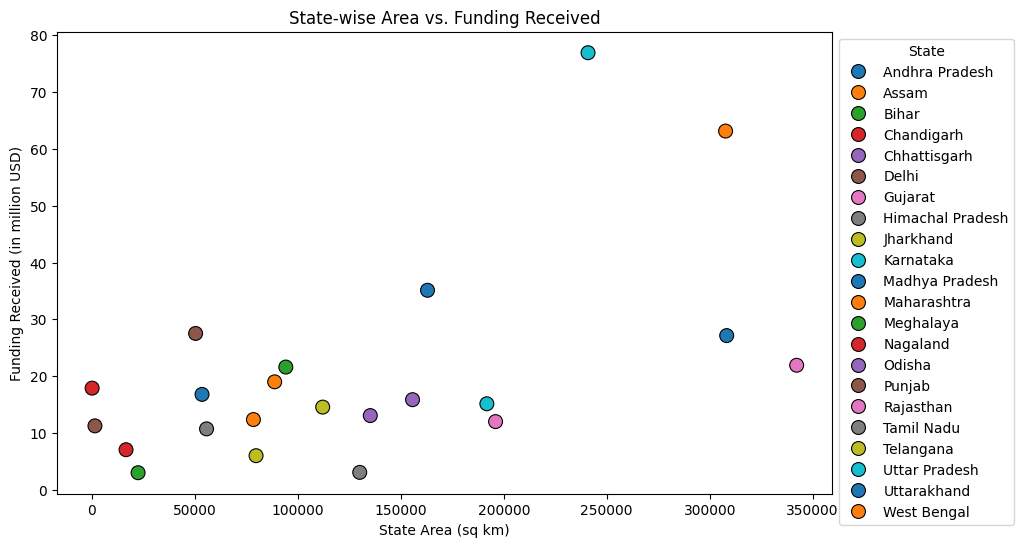

In [ ]:
df_ncap_total=df_ncap.groupby('State')['Total fund released'].sum().reset_index()
df_state_area=df_state.groupby('State')['Area (km2)'].sum().reset_index()
df_ncap_total=df_state_area.merge(df_ncap_total,on='State', how='left').dropna().reset_index()
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_ncap_total, x='Area (km2)', y='Total fund released', hue='State', palette='tab10', s=100, edgecolor='black'
)

plt.xlabel("State Area (sq km)")
plt.ylabel("Funding Received (in million USD)")
plt.title("State-wise Area vs. Funding Received")

plt.legend(title="State", bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

# Miscellaneous Questions

**Q1.** For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³).

In [ ]:
city_avg_pm25=df_main_2023.groupby('city')['PM2.5'].mean()
most_polluted_city = city_avg_pm25.idxmax()

city_data=df_main_2023[df_main_2023['city']==most_polluted_city]

hazardous_threshold = 300
days_above_threshold = city_data[city_data['PM2.5'] > hazardous_threshold].shape[0]
total_days = city_data.shape[0] #365 days


percentage_above_threshold = (days_above_threshold / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of days with PM2.5 levels above 300 µg/m³: {percentage_above_threshold:.2f}%")

Most polluted city in 2023: Darbhanga
Percentage of days with PM2.5 levels above 300 µg/m³: 0.82%


**Q2.** Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

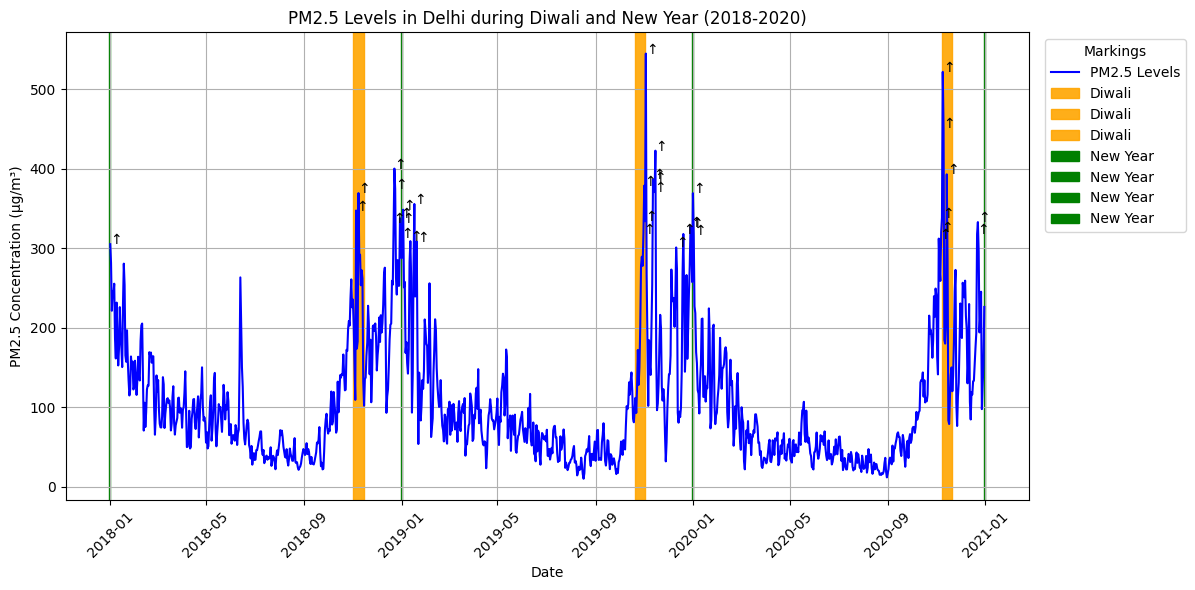

In [ ]:
delhi_data = df_main[(df_main['city'] == 'Delhi') & (df_main['Timestamp'].dt.year >= 2018) & (df_main['Timestamp'].dt.year <= 2020)]

delhi_data_pm25=delhi_data.groupby('Timestamp')['PM2.5'].mean().reset_index()

diwali_dates = [
    ('2018-11-01', '2018-11-15'),
    ('2019-10-21', '2019-11-2'),
    ('2020-11-08', '2020-11-20')
]

new_year_dates = [
    ('2017-12-31', '2018-01-01'),
    ('2018-12-31', '2019-01-01'),
    ('2019-12-31', '2020-01-01'),
    ('2020-12-31', '2021-01-01')
]

plt.figure(figsize=(12, 6))
plt.plot(delhi_data_pm25['Timestamp'], delhi_data_pm25['PM2.5'], label='PM2.5 Levels', color='b')

#Diwali time
for start, end in diwali_dates:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='orange', alpha=0.9, label="Diwali")

# New year time
for start, end in new_year_dates:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='green', alpha=1, label="New Year")

spike_threshold = 300
spikes = delhi_data_pm25[delhi_data_pm25['PM2.5'] > spike_threshold]

for idx, row in spikes.iterrows():
    plt.annotate('↑',xy=(row['Timestamp'],row['PM2.5']))

plt.title('PM2.5 Levels in Delhi during Diwali and New Year (2018-2020)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend(title='Markings',bbox_to_anchor=(1.17,1),loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**Q3.** Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023.

In [ ]:
df_ncap['Amount released during FY 2020-21']=pd.to_numeric(df_ncap['Amount released during FY 2020-21'],errors='coerce')
state_fund_2020=df_ncap.groupby('State')['Amount released during FY 2020-21'].sum().reset_index()

max_funded=state_fund_2020['Amount released during FY 2020-21'].idxmax()

max_funded_state=state_fund_2020.loc[max_funded,'State']
max_fund=state_fund_2020.loc[max_funded,'Amount released during FY 2020-21']

print(f"State with highest NCAP funding in 2020: {max_funded_state}, Amount: {max_fund} crores")

state_data=df_main[df_main['state']==max_funded_state]

data_2020 = state_data[state_data['Timestamp'].dt.year == 2020]
data_2023 = state_data[state_data['Timestamp'].dt.year == 2023]

avg_pm25_2020 = data_2020['PM2.5'].mean()
avg_pm25_2023 = data_2023['PM2.5'].mean()

print(f"Average PM2.5 in {max_funded_state} in 2020: {avg_pm25_2020} µg/m³")
print(f"Average PM2.5 in {max_funded_state} in 2023: {avg_pm25_2023} µg/m³")

improvement_percentage = ((avg_pm25_2020 - avg_pm25_2023) / avg_pm25_2020) * 100

if improvement_percentage > 10:
    print(f"Pollution levels improved significantly by {improvement_percentage:.2f}%")
else:
    print(f"Pollution levels did not improve significantly. Change: {improvement_percentage:.2f}%")

State with highest NCAP funding in 2020: Andhra Pradesh, Amount: 17.28 crores
Average PM2.5 in Andhra Pradesh in 2020: 30.425130090377408 µg/m³
Average PM2.5 in Andhra Pradesh in 2023: 36.294259033390105 µg/m³
Pollution levels did not improve significantly. Change: -19.29%


**Q4.** Draw the map of India and plot the sensor locations on the map.

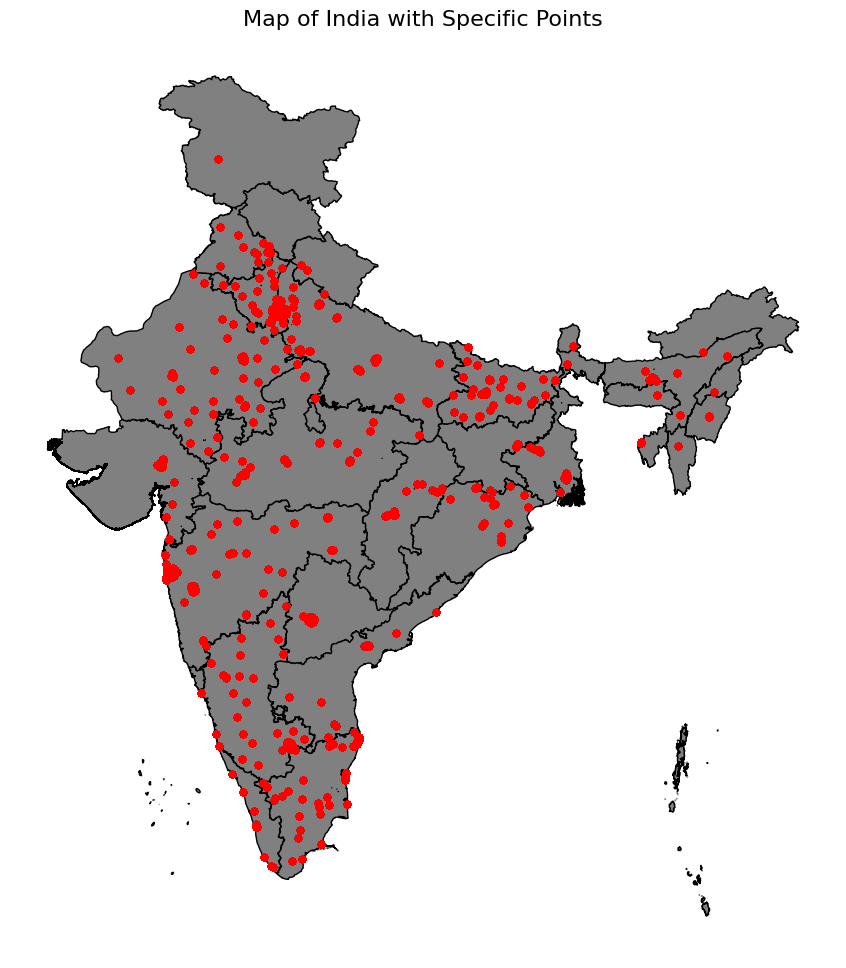

In [171]:
df_position=df_main[['latitude','longitude']]
india_map = gpd.read_file('states_india.geojson')
fig, ax = plt.subplots(figsize=(12, 12))
india_map.plot(ax=ax, edgecolor='black', facecolor='grey')
ax.scatter(df_position['longitude'], df_position['latitude'], color='red', s=20)
ax.axis('off')
plt.title('Map of India with Specific Points', fontsize=16)
plt.show()

# Tell us something new

**Q1.** Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

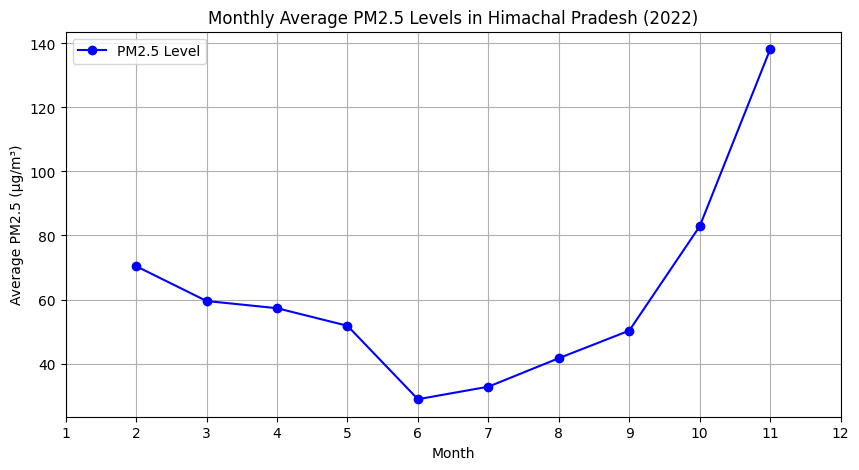

Conclusion:
- The highest pollution in Himachal Pradesh in 2022 occurred in 11 with an average PM2.5 of 138.20 µg/m³.
- The lowest pollution was in 6 with an average PM2.5 of 28.85 µg/m³.
- Winter months show significantly higher pollution levels, likely due to vehicle emissions, wood burning, and air stagnation.
- Summer and monsoon months experience lower pollution due to rain and better air circulation.
- Policy actions such as restricting diesel vehicles and promoting electric transport should be implemented in peak pollution months.


In [179]:
# Write your code here
import matplotlib.pyplot as plt

# Filter data for Himachal Pradesh for the year 2022
hp_2022= df_main[(df_main["Timestamp"].dt.year == 2022) & (df_main['state']=='Himachal Pradesh')]

# Group by month to get average PM2.5 levels

hp_2022_monthly = hp_2022.groupby([pd.Grouper(key="Timestamp", freq="M")])['PM2.5'].mean().reset_index().dropna()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(hp_2022_monthly.index, hp_2022_monthly["PM2.5"], marker='o', linestyle='-', color='b', label="PM2.5 Level")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Monthly Average PM2.5 Levels in Himachal Pradesh (2022)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

# Print conclusion based on the analysis
max_pm25_month = hp_2022_monthly.loc[hp_2022_monthly["PM2.5"].idxmax()]
min_pm25_month = hp_2022_monthly.loc[hp_2022_monthly["PM2.5"].idxmin()]

print(f"Conclusion:")
print(f"- The highest pollution in Himachal Pradesh in 2022 occurred in {hp_2022_monthly["PM2.5"].idxmax()} with an average PM2.5 of {max_pm25_month['PM2.5']:.2f} µg/m³.")
print(f"- The lowest pollution was in {hp_2022_monthly["PM2.5"].idxmin()} with an average PM2.5 of {min_pm25_month['PM2.5']:.2f} µg/m³.")
print("- Winter months show significantly higher pollution levels, likely due to vehicle emissions, wood burning, and air stagnation.")
print("- Summer and monsoon months experience lower pollution due to rain and better air circulation.")
print("- Policy actions such as restricting diesel vehicles and promoting electric transport should be implemented in peak pollution months.")
